# Восстановление золота из руды

### Цель проекта: подготовить прототип модели машинного обучения, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды.

### Описание проекта:

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

Модель должна помочь оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Содержание


<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2">Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3">Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4">Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
# Импортируем библиотеки

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Объявим константы

STATE = np.random.RandomState(12345)

In [3]:
# Загружаем данные в датасеты

pth1 = '/Users/defrekasik/Downloads/gold_industry_full.csv'
pth2 = '/Users/defrekasik/Downloads/gold_industry_train.csv'
pth3 = '/Users/defrekasik/Downloads/gold_industry_test.csv'
pth4 = '/datasets/gold_industry_full.csv'
pth5 = '/datasets/gold_industry_train.csv'
pth6 = '/datasets/gold_industry_test.csv'

if os.path.exists(pth1):

    data_full = pd.read_csv(pth1, parse_dates = ['date'])
    data_train = pd.read_csv(pth2, parse_dates = ['date'])
    data_test = pd.read_csv(pth3, parse_dates = ['date'])


elif os.path.exists(pth4):

    data_full = pd.read_csv(pth4, parse_dates = ['date'])
    data_train = pd.read_csv(pth5, parse_dates = ['date'])
    data_test = pd.read_csv(pth6, parse_dates = ['date'])

else:
    print('Something is wrong')

In [4]:
data = [data_full, data_train, data_test]

for i in data:
    display(i.info())
    display(i.head())
    display(i.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   rougher.input.feed_au                               19439 non-null  float64       
 2   rougher.input.feed_ag                               19439 non-null  float64       
 3   rougher.input.feed_pb                               19339 non-null  float64       
 4   rougher.input.feed_sol                              19340 non-null  float64       
 5   rougher.input.feed_rate                             19428 non-null  float64       
 6   rougher.input.feed_size                             19294 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64       
 8   roughe

None

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                               14579 non-null  float64       
 2   rougher.input.feed_ag                               14579 non-null  float64       
 3   rougher.input.feed_pb                               14507 non-null  float64       
 4   rougher.input.feed_sol                              14502 non-null  float64       
 5   rougher.input.feed_rate                             14572 non-null  float64       
 6   rougher.input.feed_size                             14478 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64       
 8   roughe

None

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4832 non-null   float64       
 4   rougher.input.feed_sol                      4838 non-null   float64       
 5   rougher.input.feed_rate                     4856 non-null   float64       
 6   rougher.input.feed_size                     4816 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64       
 9   rougher.

None

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


В результате загрузки данных мы получили три датасета. В первом (data_full) 19439 строк и 87 столбцов, во втором (data_train) 14579 строк и 87 столбцов, в третьем (data_test) 4860 строк и 87 столбцов.

Проверим, что эффективность обогащения рассчитана правильно. Эффективность высчитывается по следующей формуле:

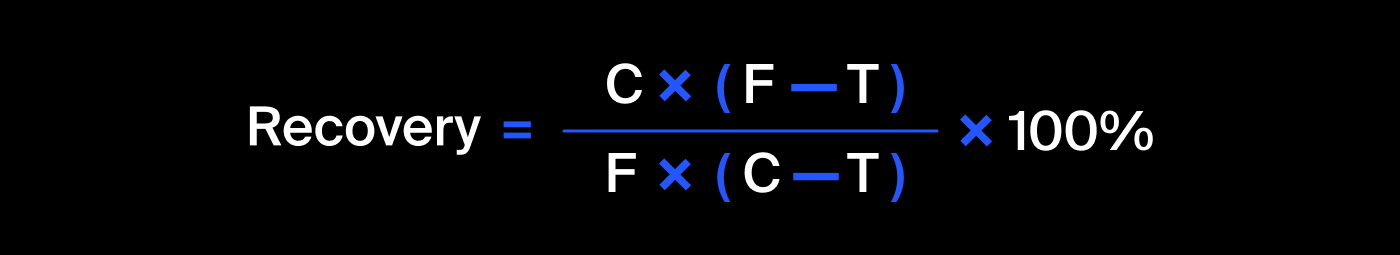

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [5]:
# Вычислим recovery на обучающей выборке для признака rougher.output.recovery

C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
output_recovery = data_train['rougher.output.recovery']
recovery = C * (F - T) / F / (C - T) * 100

print('Абсолютная средняя ошибка =', mean_absolute_error(output_recovery, recovery))

Абсолютная средняя ошибка = 1.0887389640100767e-14


MAE между значением recovery и значениями признака незначительна. Это значит, что эффективность обогащения рассчитана правильно.

In [6]:
# Посмотрим, каких признаков нет в тестовой выборке

set(data_train.columns)-set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке нет признаков, которые описывают параметры продукта и расчетные характеристики, получаемые в конце каждого из этапов технологического процесса:
- флотации (rougher.output, rougher.calculation);
- первичной очистки (primary_cleaner.output);
- вторичной очистки (secondary_cleaner.output);
- получнеие финальных характеристик (final.output).

In [7]:
# Проверим данные на наличие явных дубликатов

print('Всего явных дубликатов:', data_full.duplicated().sum())
print('Всего явных дубликатов:', data_train.duplicated().sum())
print('Всего явных дубликатов:', data_test.duplicated().sum())

Всего явных дубликатов: 0
Всего явных дубликатов: 0
Всего явных дубликатов: 0


In [8]:
# Проверим данные на наличие пропусков

for i in data:
    display(i.isna().sum())

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [9]:
# Заполним пропуски значениями, которые идут перед пропущенными, поскольку по условию задачи известно, что соседние по времени параметры часто похожи

data_full = data_full.fillna(method='ffill')
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

display(data_full.info())
display(data_train.info())
display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   rougher.input.feed_au                               19439 non-null  float64       
 2   rougher.input.feed_ag                               19439 non-null  float64       
 3   rougher.input.feed_pb                               19439 non-null  float64       
 4   rougher.input.feed_sol                              19439 non-null  float64       
 5   rougher.input.feed_rate                             19439 non-null  float64       
 6   rougher.input.feed_size                             19439 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   19439 non-null  float64       
 8   roughe

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                               14579 non-null  float64       
 2   rougher.input.feed_ag                               14579 non-null  float64       
 3   rougher.input.feed_pb                               14579 non-null  float64       
 4   rougher.input.feed_sol                              14579 non-null  float64       
 5   rougher.input.feed_rate                             14579 non-null  float64       
 6   rougher.input.feed_size                             14579 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   14579 non-null  float64       
 8   roughe

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4860 non-null   float64       
 4   rougher.input.feed_sol                      4860 non-null   float64       
 5   rougher.input.feed_rate                     4860 non-null   float64       
 6   rougher.input.feed_size                     4860 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4860 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4860 non-null   float64       
 9   rougher.

None

В результате предобработки данных были заполнены пропуски, дубликаты не обнаружены.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) и твердых частиц (Sol) на различных этапах очистки руды:

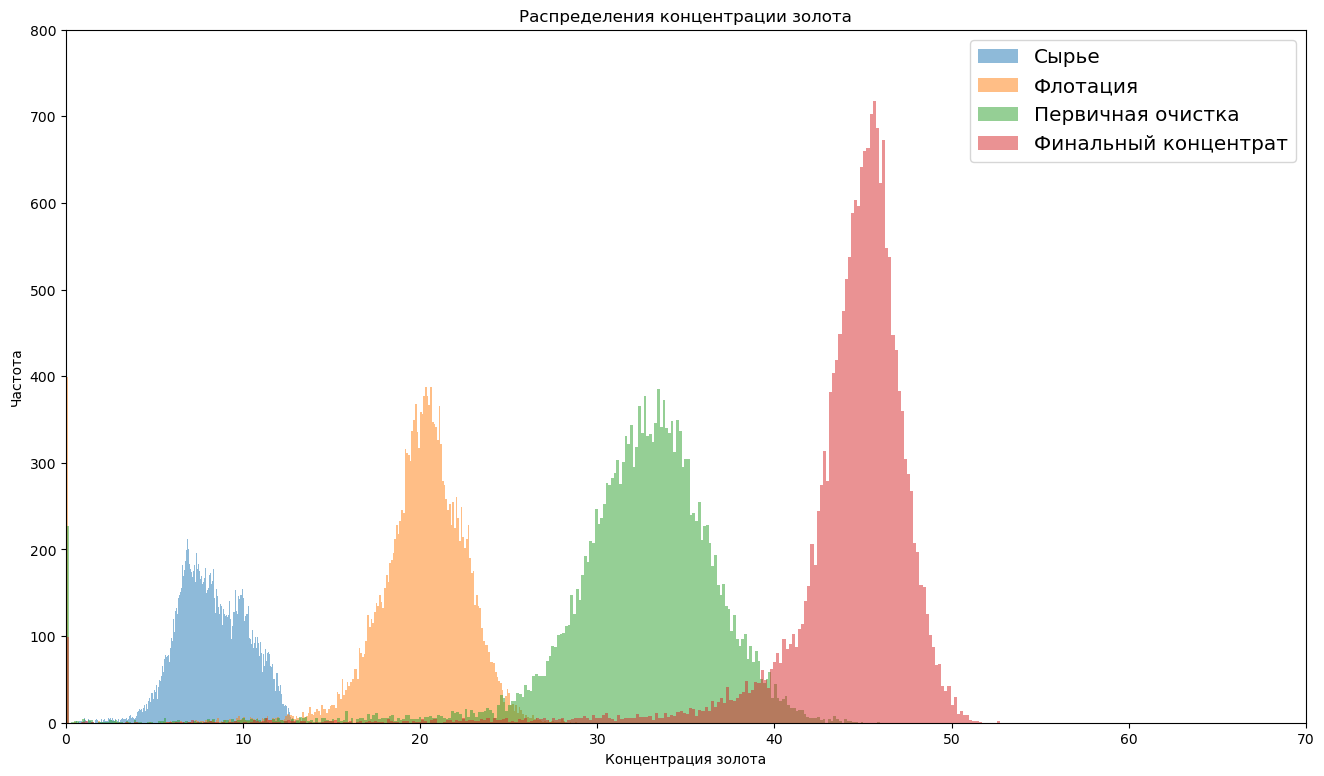

In [10]:
# Построим график распределений концентрации золота

plt.figure(figsize=[16,9])

plt.hist(data_full['rougher.input.feed_au'], bins=300, label = 'Сырье', alpha = 0.5)
plt.hist(data_full['rougher.output.concentrate_au'], bins=300, label = 'Флотация', alpha = 0.5)
plt.hist(data_full['primary_cleaner.output.concentrate_au'], bins=300, label = 'Первичная очистка', alpha = 0.5)
plt.hist(data_full['final.output.concentrate_au'], bins=300, label = 'Финальный концентрат', alpha = 0.5)

plt.xlim([0, 70])
plt.ylim([0, 800])

plt.xlabel('Концентрация золота')
plt.ylabel('Частота')

plt.legend(loc='upper right', fontsize='x-large')
plt.title('Распределения концентрации золота')
plt.show()

По графику видно, что с каждым этапом очистки руды концентрация золота значительно повышается. Кроме того, на графике наблюдается большое количество нулевых значений, которые похожи на аномальные значения, подлежащие удалению.

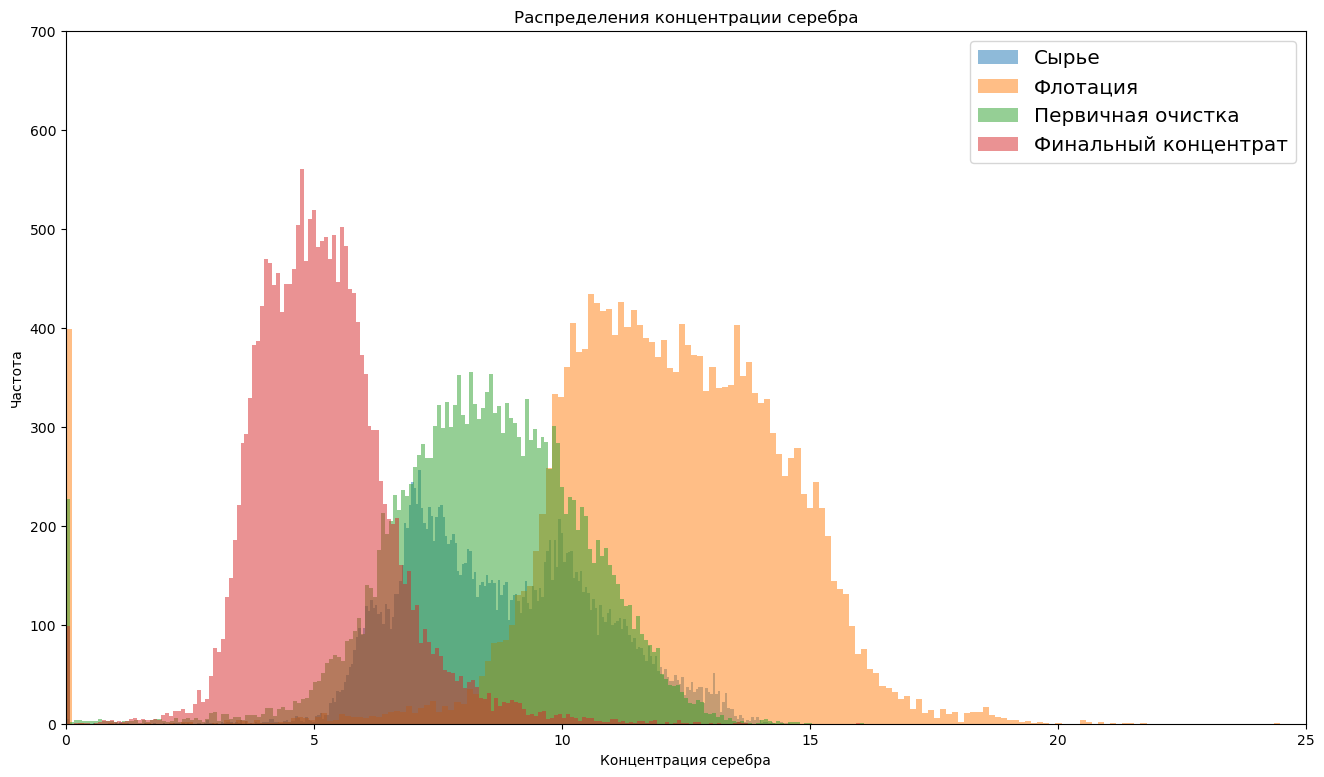

In [11]:
# Построим график распределений концентрации серебра

plt.figure(figsize=[16,9])

plt.hist(data_full['rougher.input.feed_ag'], bins=300, label = 'Сырье', alpha = 0.5)
plt.hist(data_full['rougher.output.concentrate_ag'], bins=200, label = 'Флотация', alpha = 0.5)
plt.hist(data_full['primary_cleaner.output.concentrate_ag'], bins=200, label = 'Первичная очистка', alpha = 0.5)
plt.hist(data_full['final.output.concentrate_ag'], bins=200, label = 'Финальный концентрат', alpha = 0.5)

plt.xlim([0, 25])
plt.ylim([0, 700])

plt.xlabel('Концентрация серебра')
plt.ylabel('Частота')

plt.legend(loc='upper right', fontsize='x-large')
plt.title('Распределения концентрации серебра')
plt.show()

На графике видно, что концентрация серебра на первом этапе увеличивается, а затем понижается с каждым последующим этапом очистки руды, что логично, ведь главная задача процесса очистки - получение золота, а не серебра. На графике также видно большое количество нулевых значений.

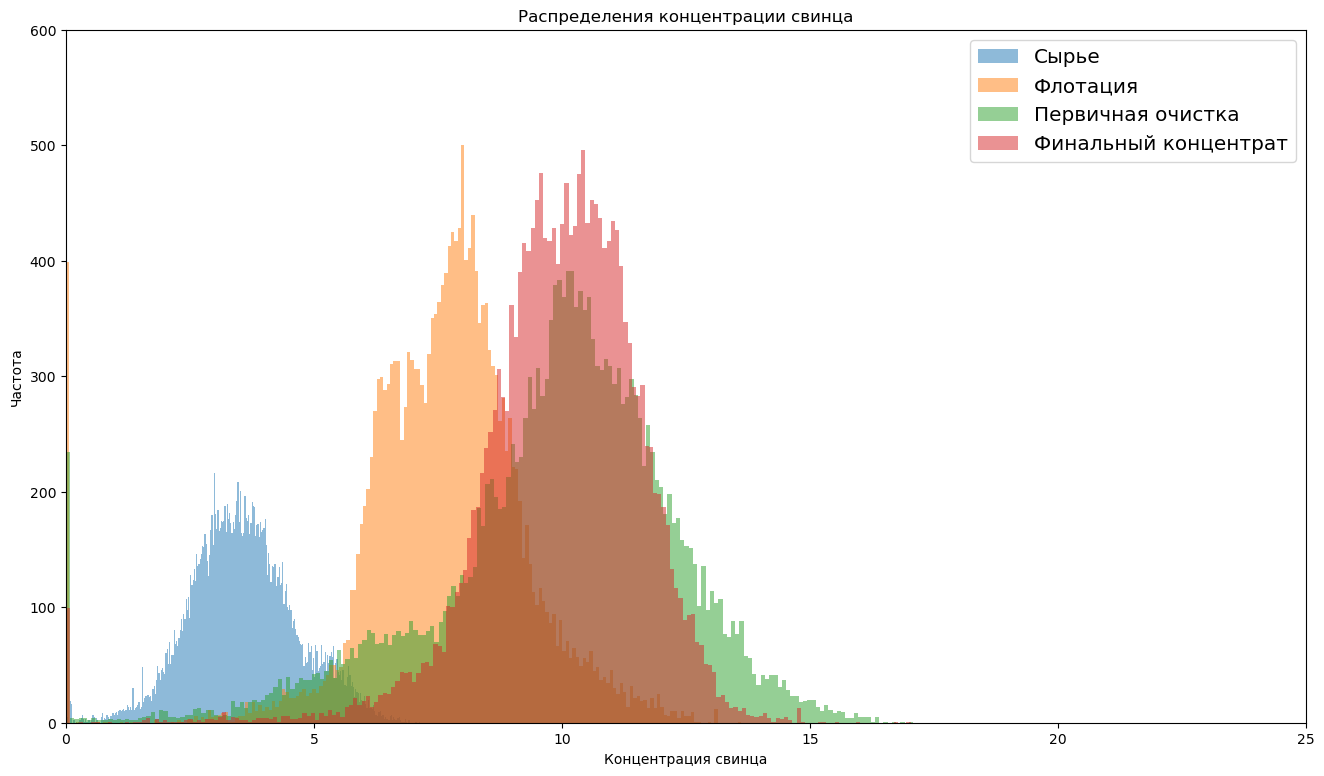

In [12]:
# Построим график распределений концентрации свинца

plt.figure(figsize=[16,9])

plt.hist(data_full['rougher.input.feed_pb'], bins=300, label = 'Сырье', alpha = 0.5)
plt.hist(data_full['rougher.output.concentrate_pb'], bins=200, label = 'Флотация', alpha = 0.5)
plt.hist(data_full['primary_cleaner.output.concentrate_pb'], bins=200, label = 'Первичная очистка', alpha = 0.5)
plt.hist(data_full['final.output.concentrate_pb'], bins=200, label = 'Финальный концентрат', alpha = 0.5)

plt.xlim([0, 25])
plt.ylim([0, 600])

plt.xlabel('Концентрация свинца')
plt.ylabel('Частота')

plt.legend(loc='upper right', fontsize='x-large')
plt.title('Распределения концентрации свинца')
plt.show()

Судя по графику, концентрация свинца немного увеличивается после первичной очистки и усредняется на заключительном этапе. Нулевые значения присутствуют и здесь.

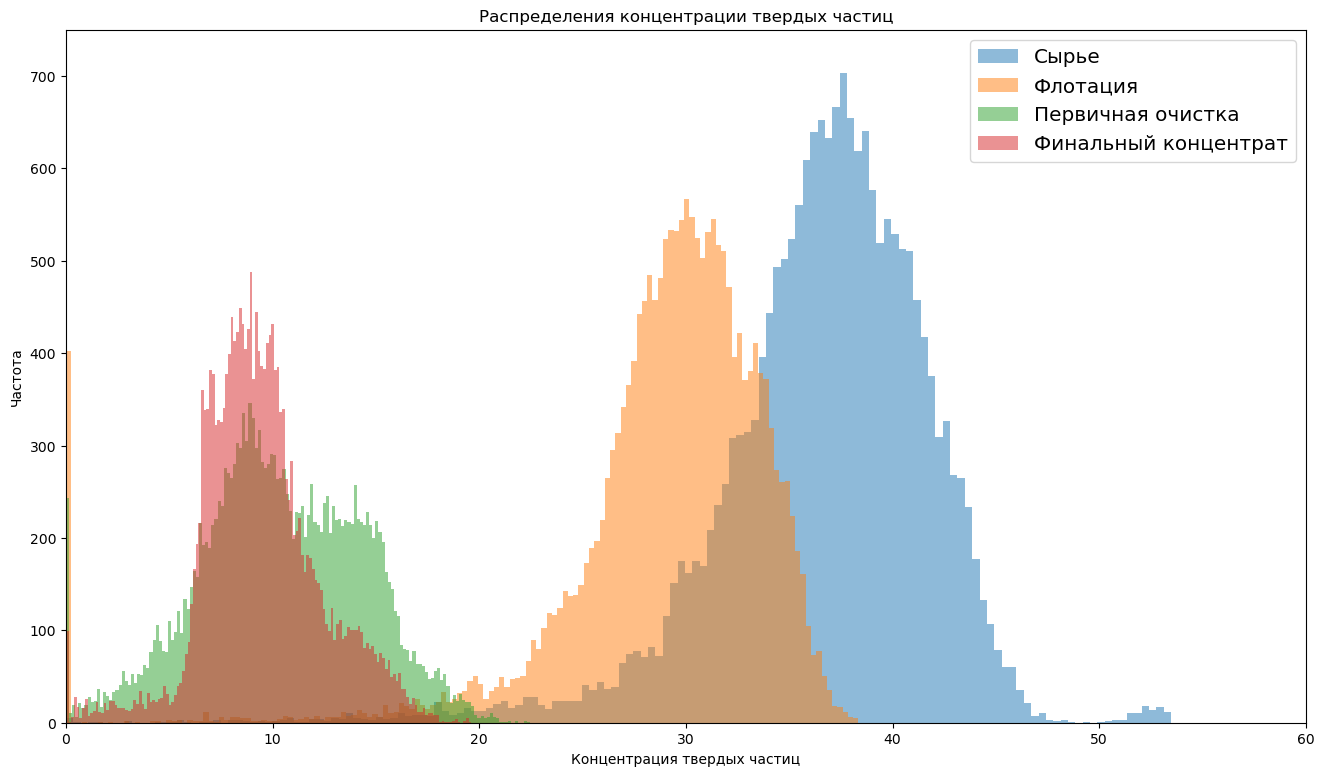

In [13]:
plt.figure(figsize=[16,9])

plt.hist(data_full['rougher.input.feed_sol'], bins=150, label = 'Сырье', alpha = 0.5)
plt.hist(data_full['rougher.output.concentrate_sol'], bins=150, label = 'Флотация', alpha = 0.5)
plt.hist(data_full['primary_cleaner.output.concentrate_sol'], bins=150, label = 'Первичная очистка', alpha = 0.5)
plt.hist(data_full['final.output.concentrate_sol'], bins=150, label = 'Финальный концентрат', alpha = 0.5)

plt.xlim([0, 60])
plt.ylim([0, 750])

plt.xlabel('Концентрация твердых частиц')
plt.ylabel('Частота')

plt.legend(loc='upper right', fontsize='x-large')
plt.title('Распределения концентрации твердых частиц')
plt.show()

Концентрация твердых частиц значительно сокращается после первых двух этапов очистки, что отображено на графике. Кроме того, мы видим большое количество аномальных значений.

Для более качественного обучения моделей, стоит удалить аномальные значения из данных. Для того, чтобы это сделать, создадим в исходной и тестовой выборках новые столбцы со значениями суммарной концентрации металлов на каждой стадии очистки руды. Суммарная концентрация металлов не может быть равна нулю, поэтому полученные новые данные помогут нам очистить выборки от аномально низких значений.

In [14]:
# найдем суммарную концентрацию металлов (ag, pb, sol, au) в сырье

data_full['rougher_input'] = data_full[['rougher.input.feed_au',
                                        'rougher.input.feed_ag',
                                        'rougher.input.feed_pb',
                                        'rougher.input.feed_sol']].sum(axis=1)

data_full['rougher_output'] = data_full[['rougher.output.concentrate_au',
                                         'rougher.output.concentrate_ag',
                                         'rougher.output.concentrate_pb',
                                         'rougher.output.concentrate_sol']].sum(axis=1)

data_full['primary_cleaner'] = data_full[['primary_cleaner.output.concentrate_au',
                                          'primary_cleaner.output.concentrate_ag',
                                          'primary_cleaner.output.concentrate_pb',
                                          'primary_cleaner.output.concentrate_sol']].sum(axis=1)

data_full['final'] = data_full[['final.output.concentrate_au',
                                'final.output.concentrate_ag',
                                'final.output.concentrate_pb',
                                'final.output.concentrate_sol']].sum(axis=1)

# Удаляем аномально низкие значения

data_full=data_full[data_full['rougher_input'] >= 40]
data_full=data_full[data_full['rougher_output'] >= 40]
data_full=data_full[data_full['primary_cleaner'] >= 40]
data_full=data_full[data_full['final'] >= 40]

In [15]:
# Удалим аномальные значения в обучающей выборке

data_train['rougher_input'] = data_train[['rougher.input.feed_au',
                                          'rougher.input.feed_ag',
                                          'rougher.input.feed_pb',
                                          'rougher.input.feed_sol']].sum(axis=1)

data_train['rougher_output'] = data_train[['rougher.output.concentrate_au',
                                           'rougher.output.concentrate_ag',
                                           'rougher.output.concentrate_pb',
                                           'rougher.output.concentrate_sol']].sum(axis=1)

data_train['primary_cleaner'] = data_train[['primary_cleaner.output.concentrate_au',
                                            'primary_cleaner.output.concentrate_ag',
                                            'primary_cleaner.output.concentrate_pb',
                                            'primary_cleaner.output.concentrate_sol']].sum(axis=1)

data_train['final'] = data_train[['final.output.concentrate_au',
                                  'final.output.concentrate_ag',
                                  'final.output.concentrate_pb',
                                  'final.output.concentrate_sol']].sum(axis=1)

data_train=data_train[data_train['rougher_input'] >= 40]
data_train=data_train[data_train['rougher_output'] >= 40]
data_train=data_train[data_train['primary_cleaner'] >= 40]
data_train=data_train[data_train['final'] >= 40]

Теперь исследуем суммарную концентрацию металлов на разных стадиях очистки руды и проверим, удалены ли аномальные значения:

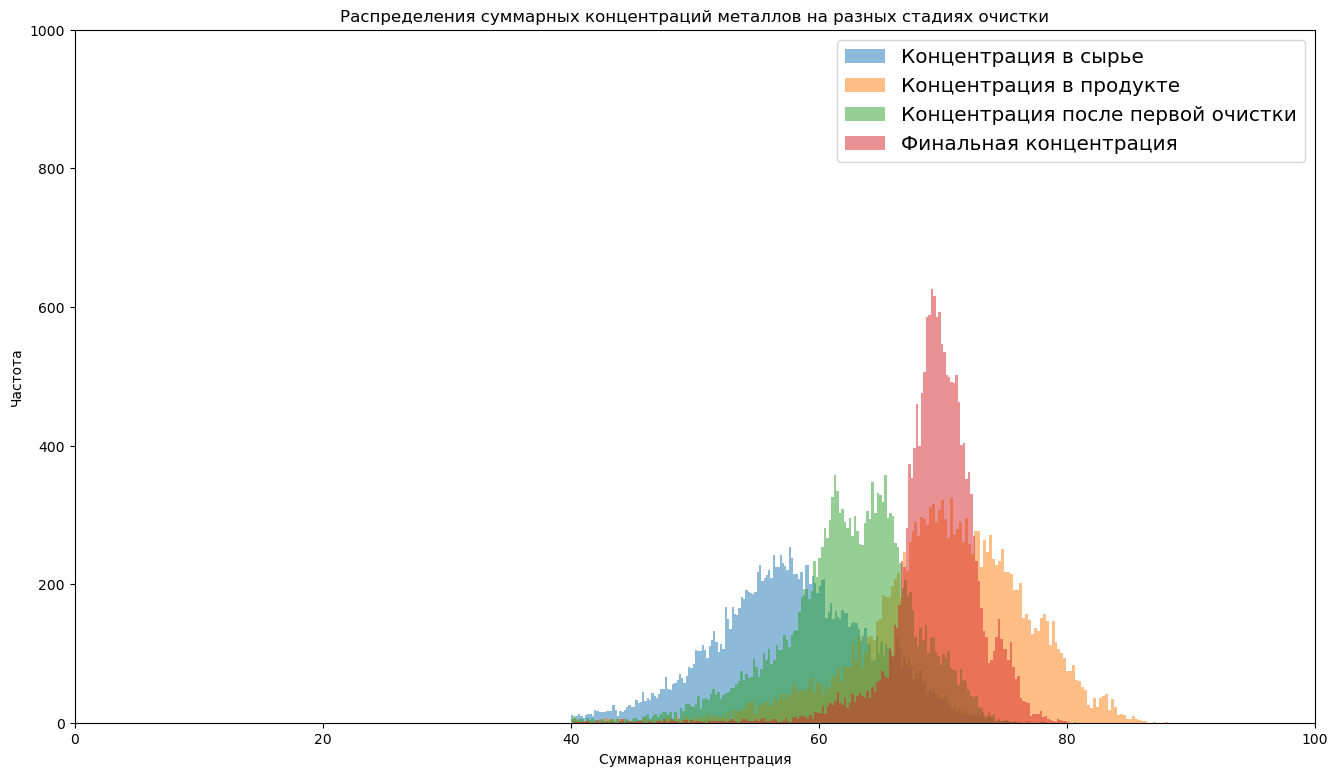

In [16]:
plt.figure(figsize=[16,9])

plt.hist(data_full['rougher_input'], bins=200, label = 'Концентрация в сырье', alpha=0.5)
plt.hist(data_full['rougher_output'], bins=200, label = 'Концентрация в продукте', alpha=0.5)
plt.hist(data_full['primary_cleaner'], bins=200, label = 'Концентрация после первой очистки', alpha=0.5)
plt.hist(data_full['final'], bins=200, label = 'Финальная концентрация', alpha=0.5)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')

plt.legend(loc='upper right', fontsize='x-large')

plt.title('Распределения суммарных концентраций металлов на разных стадиях очистки')
plt.show()

Как мы можем видеть на графике, суммарная концентрация металлов увеличивается с каждым этапом очистки. Также стоит отметить отсутствие аномальных значений.

Далее сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

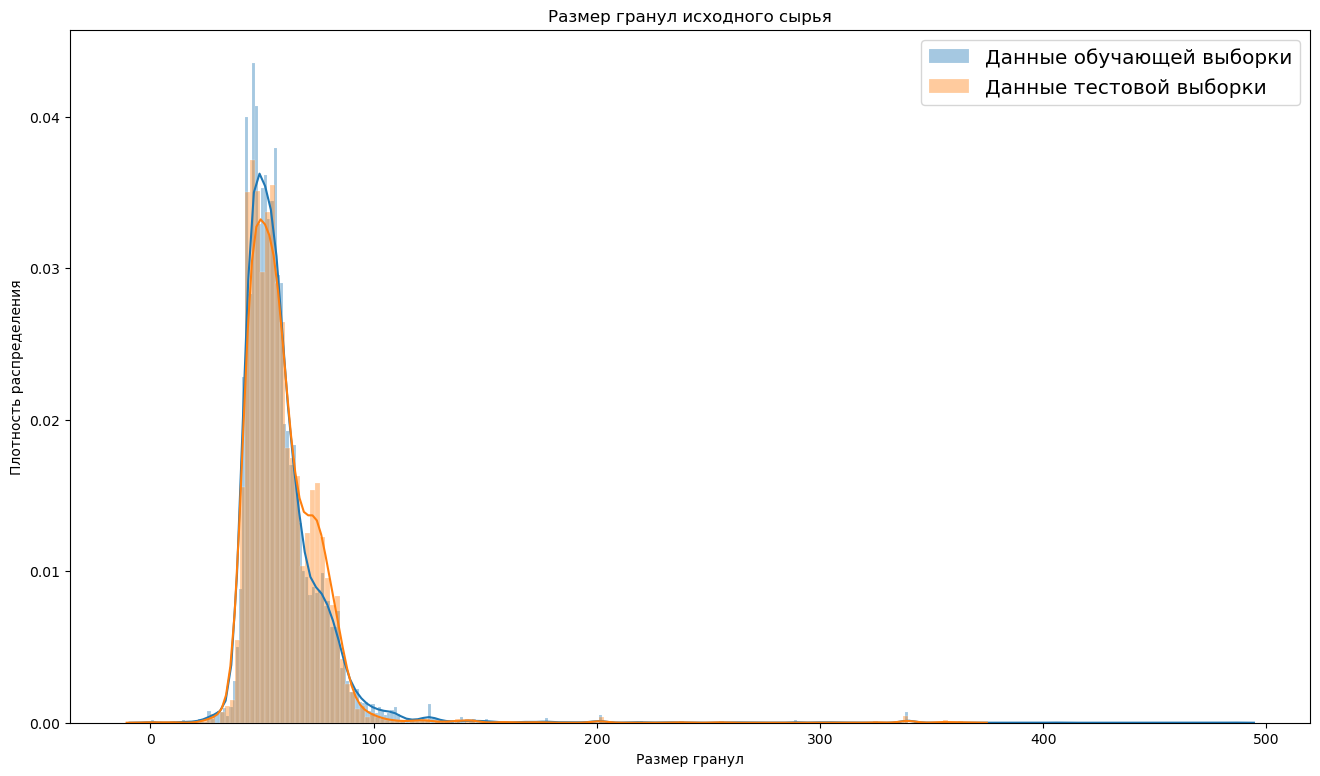

In [17]:
plt.figure(figsize=(16,9))

sns.histplot(data_train['rougher.input.feed_size'], label='Данные обучающей выборки', kde=True, stat="density",
             kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

sns.histplot(data_test['rougher.input.feed_size'], label='Данные тестовой выборки', kde=True, stat="density",
             kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

plt.xlabel('Размер гранул')
plt.ylabel('Плотность распределения')

plt.legend(loc='upper right', fontsize='x-large')
plt.title('Размер гранул исходного сырья')
plt.show()

График показывает, что распределения размеров гранул исходного сырья на обучающей и тестовой выборках практически не отличаются.

Таким образом, в результате анализа данных можно сделать несколько промежутоных выводов:

- в ходе работы было изучено, как меняется концентрация металлов (Au, Ag, Pb) и твердых частиц на различных этапах очистки руды. Оказалось, что с каждым этапом очистки руды концентрация золота значительно повышается; концентрация серебра сначала увеличивается, а затем понижается; концентрация свинца немного увеличивается после первичной очистки и усредняется на заключительном этапе; концентрация твердых частиц значительно сокращается после первых двух этапов очистки;
- распределения размеров гранул исходного сырья на обучающей и тестовой выборках практически не отличаются;
- в данных были обнаружены и удалены аномально низкие значения концентраций металлов на разных стадиях очистки.

## Модель

Перед обучением модели подготовим признаки, а также напишем функцию для вычисления sMAPE и итоговой sMAPE. Формулы для вычисления метрик выглядят так:

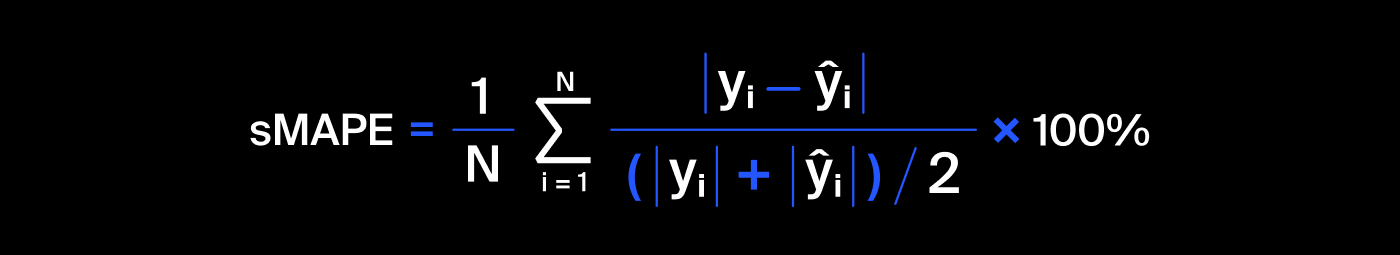

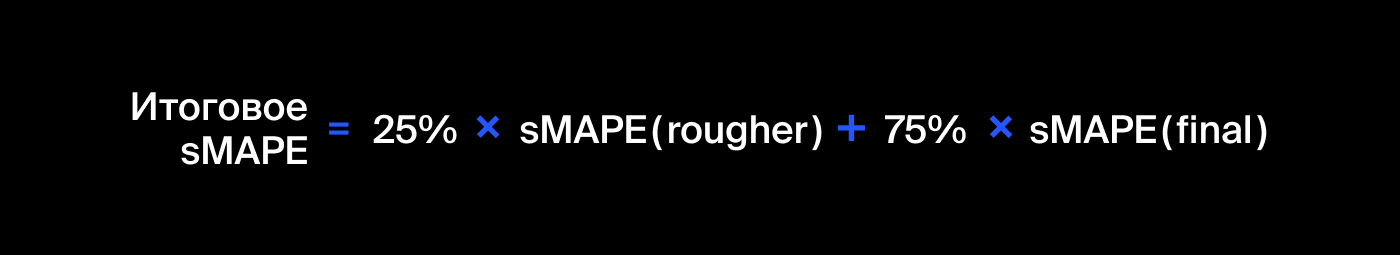

Необходимо спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

Поэтому эти признаки необходимо удалить из обучающей выборки вместе с теми признаками, которых нет в тестовой.

In [18]:
to_delete = set(data_train.columns) - set(data_test.columns)

In [19]:
# Извлекаем из данных признаки и целевые признаки для обучающей выборки

features_train = data_train.drop(columns=to_delete, axis=1)

In [20]:
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

In [21]:
# Добавим в тестовую выборку целевые признаки из исходных данных

test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

# Извлекаем признаки и целевые признаки для тестовой выборки

features_test = test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']

In [22]:
# Убираем из данных столбец 'date'

features_train = features_train.drop('date', axis=1)
features_test = features_test.drop('date', axis=1)

In [23]:
# Напишем функцию для вычисления smape

def smape(target, predicted):
    smape = (1/len(target))*np.sum((np.abs(target - predicted))/((np.abs(target)+np.abs(predicted))/2))*100
    return smape

In [24]:
# Напишем функцию для вычисления итоговой smape

def final_smape(rougher, final):
    final = 0.25 * rougher + 0.75 * final
    return final

In [25]:
# Введем собственную метрику, поскольку оценивать модели нужно по sMAPE

score = make_scorer(smape, greater_is_better = False)

Теперь обучим модели и выберем наилучшую.

In [26]:
# Decision Tree Regressor

best_result = 100
best_depth = 0
for est in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth = est, random_state = STATE)
    smape_rougher = cross_val_score(model_dt_rougher, features_train, target_train_rougher, scoring=score, cv=5)
    smape_rougher_score = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth = est, random_state = STATE)
    smape_final = cross_val_score(model_dt_final, features_train, target_train_final, scoring=score, cv=5)
    smape_final_score = smape_final.mean()

    result_smape = final_smape(smape_rougher_score, smape_final_score)*(-1)

    if result_smape < best_result:
        best_result = result_smape
        best_depth = est

print('Результат:', best_result, 'при глубине', best_depth)

Результат: 7.914635228740686 при глубине 2


In [27]:
# Random Forest Regression

best_result = 100
best_options = 0
for est in range(10, 100, 30):
    for depth in range(2, 10, 2):
        model_rfr_rougher = RandomForestRegressor(n_estimators = est, max_depth = depth, random_state=STATE)
        smape_rougher = cross_val_score(model_rfr_rougher, features_train, target_train_rougher, scoring=score, cv=5)
        smape_rougher_score = smape_rougher.mean()

        model_rfr_final = RandomForestRegressor(n_estimators = est, max_depth = depth, random_state=STATE)
        smape_final = cross_val_score(model_rfr_final, features_train, target_train_final, scoring=score, cv=5)
        smape_final_score = smape_final.mean()

        result_smape = final_smape(smape_rougher_score, smape_final_score)*(-1)

        if result_smape < best_result:
            best_result = result_smape
            best_options = [est, depth]

print('Лучший результат:', best_result, 'при параметрах', best_options)

Лучший результат: 7.824263735779539 при параметрах [40, 2]


In [28]:
# Linear Regression

model_lr_rougher = LinearRegression()
scores_rougher = cross_val_score(model_lr_rougher, features_train, target_train_rougher, scoring = score, cv=5)
smape_rougher_score = scores_rougher.mean()

model_lr_final = LinearRegression()
scores_final = cross_val_score(model_lr_final, features_train, target_train_final, scoring = score, cv=5)
smape_final_score = scores_final.mean()

result_smape = final_smape(smape_rougher_score, smape_final_score)*(-1)

print('Результат:', result_smape)

Результат: 8.538564971408034


Лучше всего себя показала модель случайного леса, её результат 7.82 

Проверим модель случайного леса на тестовой выборке:

In [31]:
model_rfr_rougher = RandomForestRegressor(n_estimators = 40, max_depth = 2, random_state=STATE)
model_rfr_rougher.fit(features_train, target_train_rougher)
predicted_rougher = model_rfr_rougher.predict(features_test)

model_rfr_final = RandomForestRegressor(n_estimators = 40, max_depth = 2, random_state=STATE)
model_rfr_final.fit(features_train, target_train_final)
predicted_final = model_rfr_final.predict(features_test)

smape_rougher = smape(target_test_rougher, predicted_rougher)
smape_final = smape(target_test_final, predicted_final)
final_smape_score = final_smape(smape_rougher, smape_final)

print('Результат:', final_smape_score)

Результат: 7.142264208499668


In [30]:
# Проверим модель на адекватность

dummy_model_rougher = DummyRegressor(strategy="mean")
dummy_model_rougher.fit(features_train, target_train_rougher)
dummy_predicted_rougher = dummy_model_rougher.predict(features_test)
smape_rougher_score = smape(target_test_rougher, dummy_predicted_rougher)

dummy_model_final = DummyRegressor(strategy="mean")
dummy_model_final.fit(features_train, target_train_final)
dummy_predicted_final = dummy_model_final.predict(features_test)
smape_final_score = smape(target_test_final, dummy_predicted_final)

result_smape = final_smape(smape_rougher_score, smape_final_score)

print('Результат:', result_smape)

Результат: 8.045184782069247


Модель показала результат лучше Dummy модели и прошла тест на адекватность.

## Итоговый вывод

В ходе работы были изучены три набора данных: обучающая выборка, тестовая выборка, а также файл с исходными данными. После предобработки данных были обработаны пропущенные значения, дубликаты не обнаружены.

- В ходе анализа данных было изучено, как меняется концентрация металлов (Au, Ag, Pb) и твердых частиц на различных этапах очистки руды. Оказалось, что с каждым этапом очистки руды концентрация золота значительно повышается, концентрация серебра сначала увеличивается, а затем понижается, концентрация свинца немного увеличивается после первичной очистки и усредняется на заключительном этапе, а концентрация твердых частиц значительно сокращается после первых двух этапов очистки;
- Анализ данных помог сделать вывод о том, что распределения размеров гранул исходного сырья на обучающей и тестовой выборках практически не отличаются;
- Не менее важным результатом исследования стало обнаружение аномально низких значений концентрации металлов на разных стадиях очистки.

Перед обучением моделей были подготовлены признаки, а также написаны функции для вычисления необходимых метрик.

Наконец, были обучены три модели - линейная регрессия, решающее дерево и случайный лес. Модель Random Forest Regressor показала наилучший результат на обучающей выборке - 7.82. Модель была проверена на тестовой выборке, показала результат 7.14 и прошла проверку на адекватность.